<a href="https://colab.research.google.com/github/yusukeorito/Master_research/blob/main/exp011/notebooks/Exp011_result001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
cd /content/drive/MyDrive/Master_research/exp011

/content/drive/MyDrive/Master_research/exp011


In [4]:
import os
import sys
import pathlib
import random
import logging

import numpy as np
import pandas as pd
import tensorflow as tf
import pickle
import warnings
from tqdm import tqdm

import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,BatchNormalization,Activation
from tensorflow.keras.callbacks import Callback,ModelCheckpoint
from tensorflow.keras.activations import relu
from tensorflow.keras.utils import plot_model

sys.path.append('../')
warnings.simplefilter('ignore')
logging.getLogger('tensorflow').setLevel(logging.ERROR)

class CFG:
    seed1 = 820
    seed2=314
    data='Fashion MNIST'
    data_seed = 42
    save_dir = '../Model/'
    output_dir = '../Output/'
    L=10
    M=60000
    N=100
    C=50
    A=0#ノイズの強さ
    ini_type = 'A'
    train='train'
    mean = 0.5  # 平均
    std_dev = 0.1  # 標準偏差
    layer_name_list =['batch_normalization1', 'batch_normalization2', 'batch_normalization3',
                   'batch_normalization4', 'batch_normalization5', 'batch_normalization6', 'batch_normalization7', 'batch_normalization8',
                   'batch_normalization9','batch_normalization10',]

## 時間変化

In [6]:
with open(f'./Output/Overlap/q/M{CFG.M}/q2_norm_stopW_ini{CFG.ini_type}_L{CFG.L}_C{CFG.C}_{CFG.train}.txt','rb') as f:
  q2=pickle.loads(f.read())

with open(f'./Output/Overlap/q/M{CFG.M}/sim_q_stopW_ini{CFG.ini_type}_L{CFG.L}_C{CFG.C}_{CFG.train}.txt','rb') as f:
  sim_q=pickle.loads(f.read())

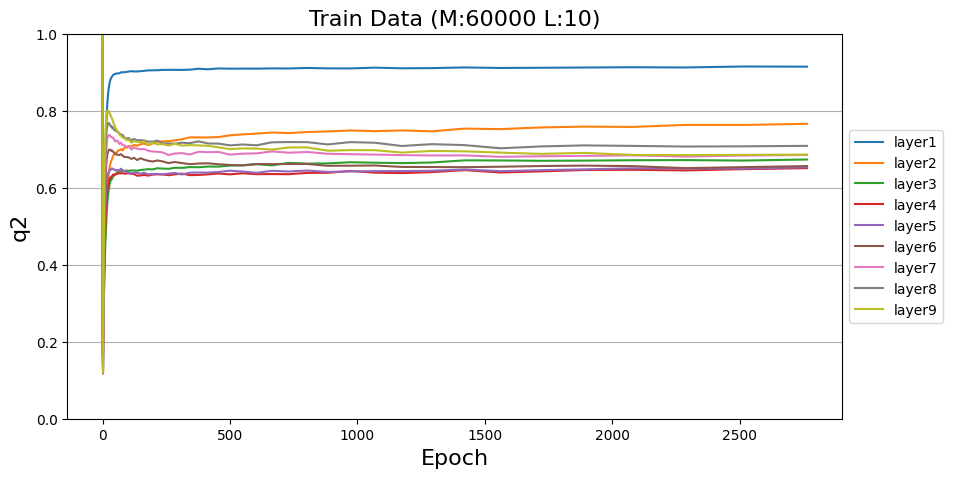

In [13]:
fig, ax = plt.subplots(figsize=(10,5))
for i, l in enumerate(CFG.layer_name_list[:-1]):
    ax.plot(q2['time'],q2[l],label=f'layer{i+1}')
ax.set_xlabel('Epoch',fontsize=16)
ax.set_ylabel('q2', fontsize=16)
#ax.set_xscale('log')
ax.set_title(f'Train Data (M:{CFG.M} L:{CFG.L})',fontsize=16)
ax.set_ylim(0,1)
ax.grid(axis='y')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

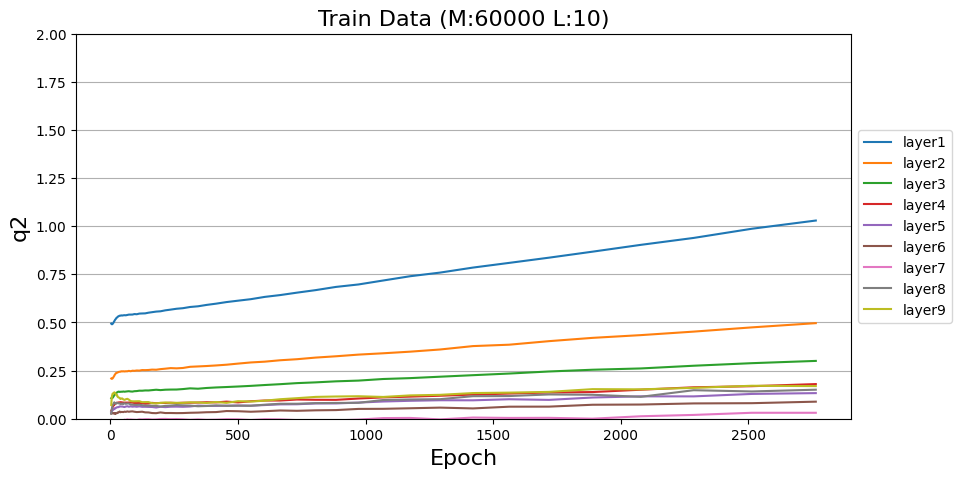

In [12]:
fig, ax = plt.subplots(figsize=(10,5))
for i, l in enumerate(CFG.layer_name_list[:-1]):
    ax.plot(sim_q['time'][3:],sim_q[l][3:],label=f'layer{i+1}')
ax.set_xlabel('Epoch',fontsize=16)
ax.set_ylabel('q2', fontsize=16)
#ax.set_xscale('log')
ax.set_title(f'Train Data (M:{CFG.M} L:{CFG.L})',fontsize=16)
ax.set_ylim(0,2)
ax.grid(axis='y')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [ ]:
layer_list=[]
for C in [10,30,50, 100]:
  with open(f'./Output/Overlap/Layer_q/M{CFG.M}/layerq_norm_ini{CFG.ini_type}_L{CFG.L}_C{C}_train.txt','rb') as f:
    layer_q =pickle.loads(f.read())
    layer_list.append(layer_q)

(0.0, 1.0)

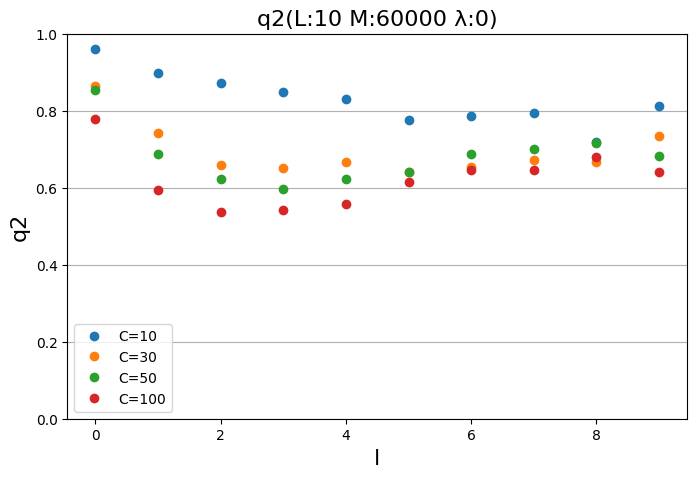

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
c_list = [10,30,50, 100]
for layer_q, c in zip(layer_list,c_list):
  ax.plot(layer_q['q2'],'.',markersize=12, label=f'C={c}')
  ax.set_xlabel('l',fontsize=16)
  ax.set_ylabel('q2',fontsize=16)
  ax.set_title(f'q2(L:{CFG.L} M:{CFG.M} λ:{CFG.A})',fontsize=16)
  ax.legend()
ax.grid(axis='y')
ax.set_ylim(0,1)

In [ ]:
with open(f'./Output/Loss/M{CFG.M}/perform001_ini{CFG.ini_type}_L{CFG.L}_C{CFG.C}_{CFG.train}.txt','rb') as f:
    history=pickle.loads(f.read())

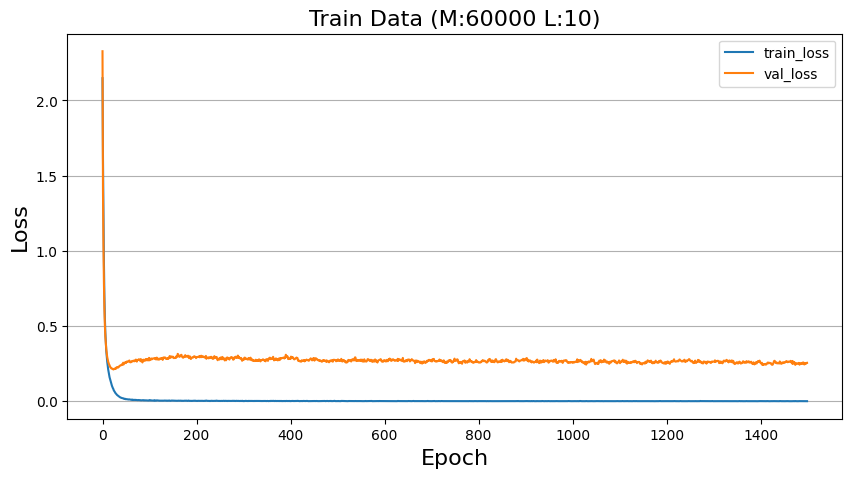

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(history['loss'],label='train_loss')
ax.plot(history['val_loss'],label='val_loss')
ax.set_xlabel('Epoch',fontsize=16)
ax.set_ylabel('Loss', fontsize=16)
#ax.set_xscale('log')
ax.set_title(f'Train Data (M:{CFG.M} L:{CFG.L})',fontsize=16)
ax.grid(axis='y')
ax.legend()

In [ ]:
history_list=[]
for C in [10,30,50, 100]:
  with open(f'./Output/Loss/M{CFG.M}/perform002_ini{CFG.ini_type}_L{CFG.L}_C{C}_{CFG.train}.txt','rb') as f:
    history=pickle.loads(f.read())
  history_list.append(history)

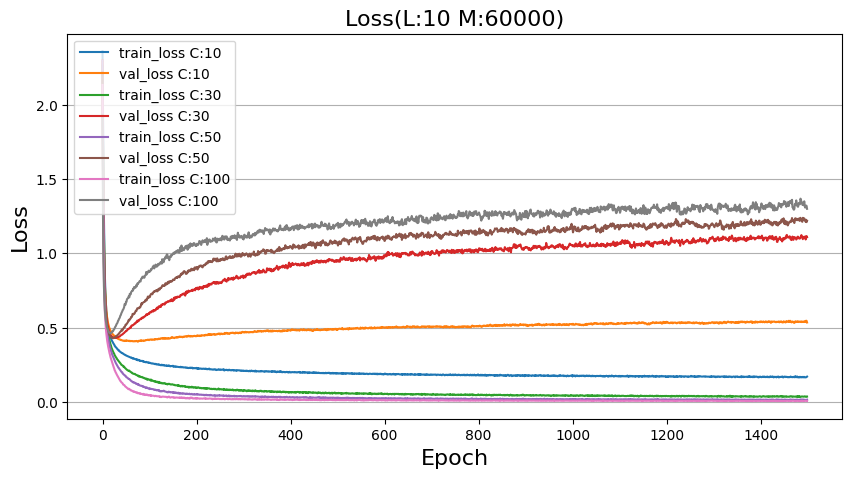

In [ ]:
c_list =[10,30,50, 100]
fig, ax = plt.subplots(figsize=(10,5))
for history, c in zip(history_list,c_list):
  ax.plot(history['loss'],label=f'train_loss C:{c}')
  ax.plot(history['val_loss'],label=f'val_loss C:{c}')
  ax.set_xlabel('Epoch',fontsize=16)
  ax.set_ylabel('Loss', fontsize=16)
  ax.set_title(f'Loss(L:{CFG.L} M:{CFG.M})',fontsize=16)


ax.grid(axis='y')
ax.legend()

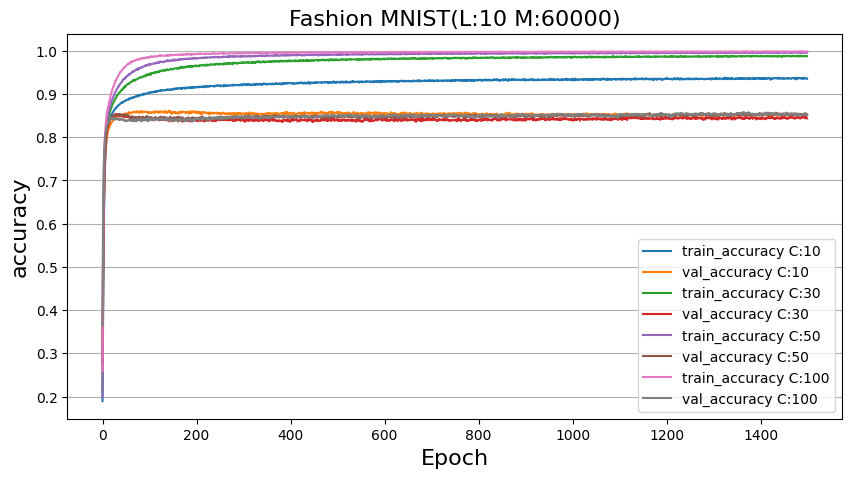

In [ ]:
c_list =[10,30,50, 100]
fig, ax = plt.subplots(figsize=(10,5))
for history, c in zip(history_list,c_list):
  ax.plot(history['accuracy'],label=f'train_accuracy C:{c}')
  ax.plot(history['val_accuracy'],label=f'val_accuracy C:{c}')
  ax.set_xlabel('Epoch',fontsize=16)
  ax.set_ylabel('accuracy', fontsize=16)
  ax.set_title(f'{CFG.data}(L:{CFG.L} M:{CFG.M})',fontsize=16)
  ax.legend()
ax.grid(axis='y')